In [105]:
import numpy as np 
import tensorflow as tf 
import tensorflow_datasets as tfds

In [106]:
from tensorflow.keras.datasets.mnist import load_data
#from tensorflow.keras.datasets.fashion_mnist import load_data

(train_images , train_labels) , (test_images , test_labels) = load_data()
print('train_images shape=' , train_images.shape, type(train_images))
print('train_labels shape=', train_labels.shape, type(train_labels))


train_images shape= (60000, 28, 28) <class 'numpy.ndarray'>
train_labels shape= (60000,) <class 'numpy.ndarray'>


In [113]:
# train_images = train_images.reshape(-1, 28, 28, 1)
# test_images = test_images.reshape(-1, 28, 28, 1)


# train_images = np.expand_dims(train_images, axis=-1)


train_images = tf.convert_to_tensor(train_images)
print(train_images.shape, type(train_images))

(60000, 28, 28, 1) <class 'tensorflow.python.framework.ops.EagerTensor'>


In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator 객체 생성
datagen = ImageDataGenerator(
    rotation_range=20,      # 이미지 회전 각도 범위
    width_shift_range=0.1,  # 가로 방향 이동 범위 (전체 너비에 대한 비율)
    height_shift_range=0.1, # 세로 방향 이동 범위 (전체 높이에 대한 비율)
    shear_range=0.2,        # 전단 변형 강도 범위
    zoom_range=0.2,         # 확대/축소 범위
    horizontal_flip=True,   # 수평으로 이미지 뒤집기
    fill_mode='nearest'     # 이미지를 회전 또는 이동시킬 때 채워지는 영역의 채우는 방식
)

In [115]:
datagen.fit(train_images)
print(len(train_images))

60000


In [116]:
generated_data = datagen.flow(train_images, train_labels, batch_size=len(train_images))

# 생성된 데이터셋의 길이 확인
print(len(generated_data))

# 데이터 증대를 수행한 후에 생성된 이미지 개수 확인
num_generated_images = 0
for _ in datagen.flow(train_images, train_labels, batch_size=32):
    num_generated_images += 32  # 한 번에 생성되는 이미지의 개수를 더합니다
    if num_generated_images >= len(train_images):
        break

print("Generated images count:", num_generated_images)


1
Generated images count: 60000


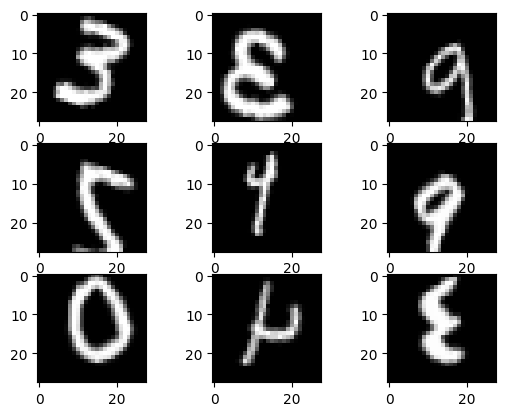

In [117]:
import matplotlib.pyplot as plt

for X_batch, y_batch in datagen.flow(train_images, train_labels, batch_size=9):
    # 생성된 이미지 시각화
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.show()
    break

In [118]:
from tensorflow.keras.applications import Xception

base_model = Xception(weights='imagenet' , include_top=False , input_shape=(28, 28, 1))
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

model.summary()

ValueError: The input must have 3 channels; Received `input_shape=(28, 28, 1)`

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, ReduceLROnPlateau
cp = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='auto')
tb = TensorBoard(log_dir='logs', histogram_freq=0, write_graph=True, write_images=True, update_freq='epoch', embeddings_freq=1)
es = EarlyStopping(monitor='val_loss', patience=10, mode='auto', verbose=1)
rl = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='auto')

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(train_images, train_labels, epochs=100, batch_size=32, validation_split=0.2, callbacks=[cp, tb, es, rl])

Epoch 1/100


ValueError: in user code:

    File "c:\Users\euiso\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\euiso\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\euiso\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\euiso\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\euiso\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\euiso\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 299, 299, 3), found shape=(32, 28, 28, 1)


In [ ]:
history.history.keys()

In [ ]:
model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
from turtle import color


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss', color='blue' )
plt.plot(history.history['val_loss'], label='Val_Loss', color='red')
plt.title('Loss Trend')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Accuracy', color='blue')
plt.plot(history.history['val_acc'], label='Val_Accuracy', color='red')
plt.title('Accuracy Trend')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

In [ ]:
pred_ys =model.predict(test_images)
print(pred_ys.shape)
print(pred_ys[0])
print(np.argmax(pred_ys[0]))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(8, 8))
cm =confusion_matrix(np.argmax(test_labels, axis= -1), np.argmax(pred_ys, axis= -1))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()